In [1]:
# from mpl_toolkits.basemap import Basemap
from IPython.display import HTML
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import operator
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()
%matplotlib inline

In [2]:
t_file = pd.read_csv('globalterrorismdb_0616dist.csv', encoding='ISO-8859-1', low_memory=False) 

In [3]:
regions = list(set(t_file.region_txt))
colors = ['yellow', 'red', 'lightblue', 'purple', 'green', 'orange', 'brown',\
          'aqua', 'lightpink', 'lightsage', 'lightgray', 'navy']

In [4]:
dd = pd.read_csv('globalterrorismdb_0616dist.csv', encoding='ISO-8859-1',  
                usecols=[0, 1, 2, 3, 8, 11, 13, 14, 26, 29, 35, 37, 84, 100, 103]
               )

## All the attacks on a WorldMap

In [5]:
plt.figure(figsize=(15,8))
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='burlywood',lake_color='lightblue', zorder = 1)
m.drawmapboundary(fill_color='lightblue')

def pltpoints(region, color = None, label = None):
    x, y = m(list(t_file.longitude[t_file.region_txt == region].astype("float")),\
            (list(t_file.latitude[t_file.region_txt == region].astype("float"))))
    points = m.plot(x, y, "o", markersize = 4, color = color, label = label, alpha = .5)
    return(points)

for i, region in enumerate(regions):
    pltpoints(region, color = colors[i], label = region)  
    
plt.title("Global Terrorism (1970 - 2015)")
plt.legend(loc ='lower left', prop= {'size':11})

NameError: name 'Basemap' is not defined

## Most popular terrorist nationality

(u'Iraq', 18285)


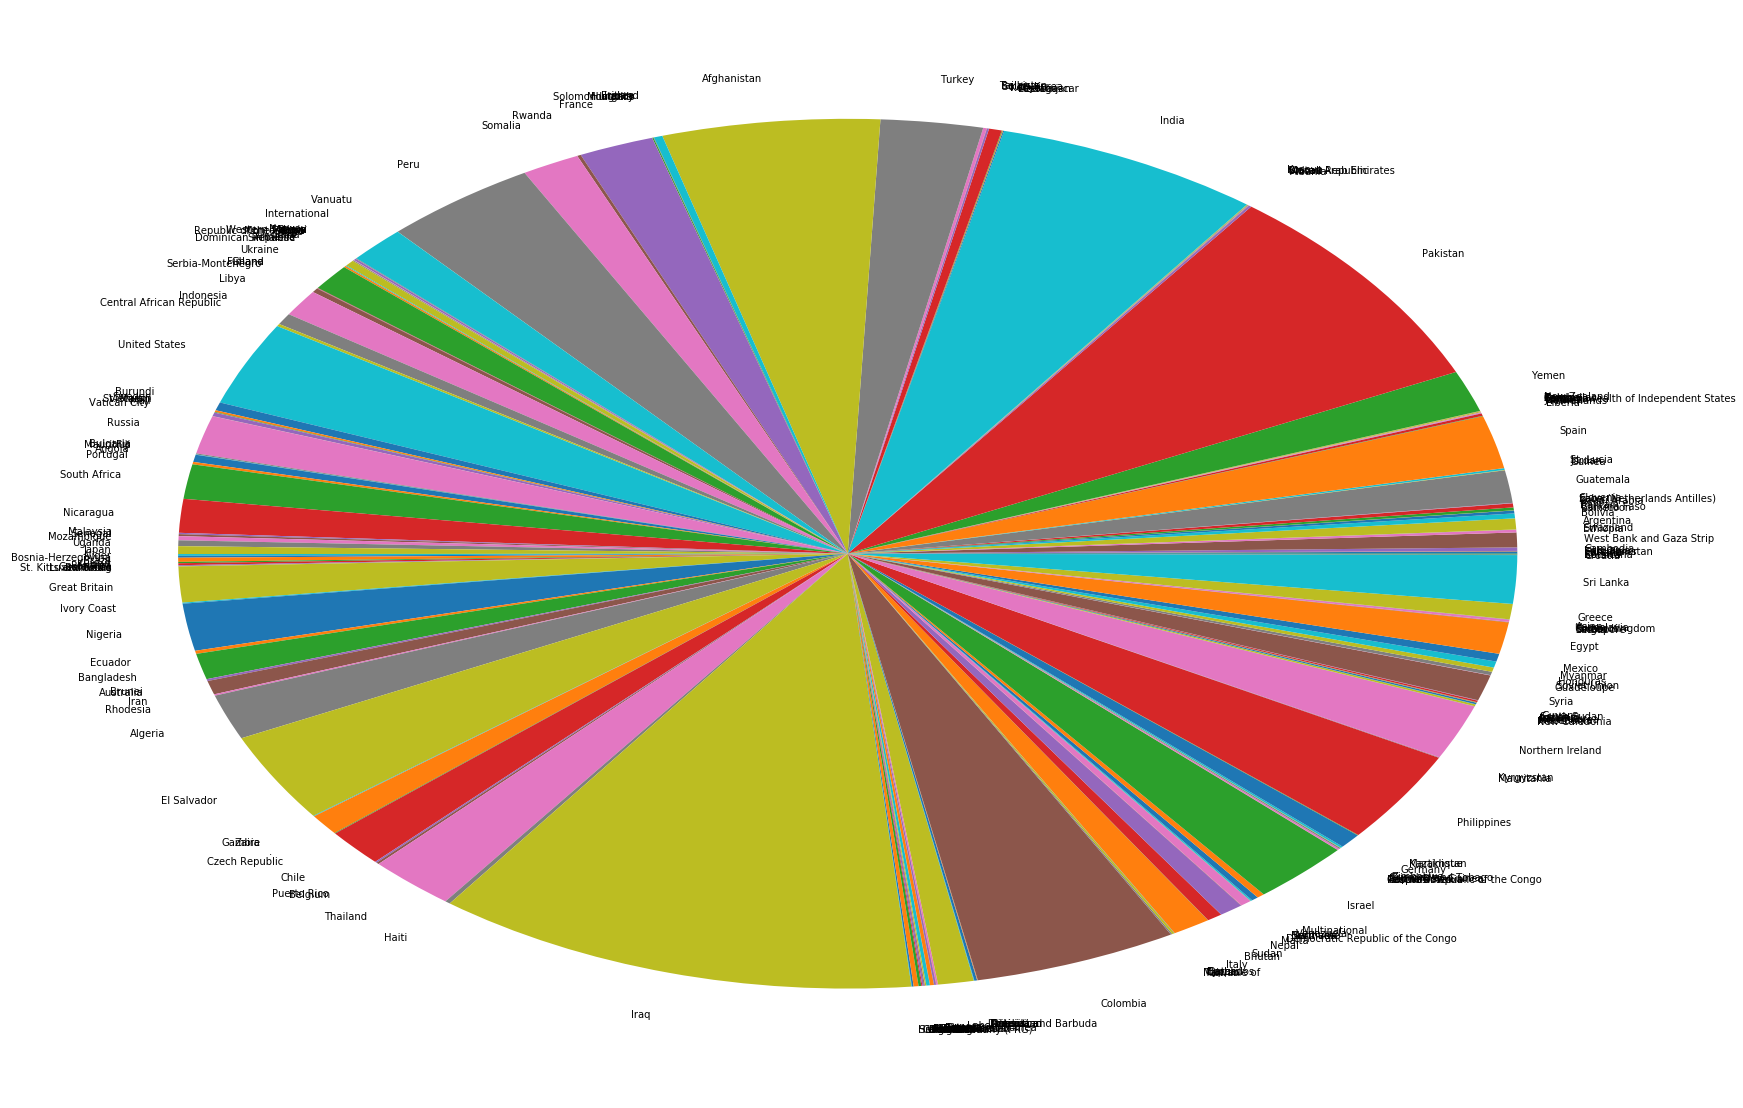

In [70]:
natdic = {}

for i in t_file['natlty1_txt']:
    natdic[i] = natdic.get(i, 1) + 1

fig = plt.figure(figsize=(30,20))

plt.pie([v for v in natdic.values()], labels=[k for k in natdic.keys()],autopct=None)
print max(natdic.iteritems(), key=operator.itemgetter(1))

## Thailand with most frequent attack within a year

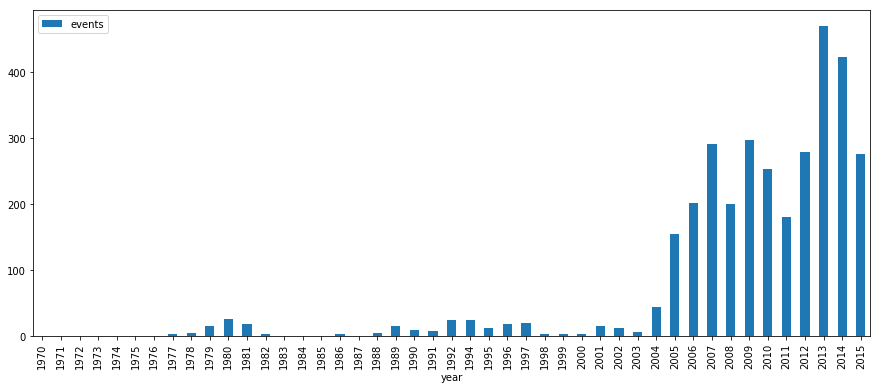

In [74]:
lst_freq_attack = []
thai_year_dict = []
frequent_log = 0
for year in set(dd.iyear):
    year_selector = dd['iyear'] == year
    selector = dd[year_selector]
    thailand_selector = selector['country_txt'] == 'Thailand'
    count_thai_selector = selector[thailand_selector].index
    thai_year_dict.append([year, len(count_thai_selector)])
    
thai_year_dict_df = pd.DataFrame(thai_year_dict)
thai_year_dict_df.columns = ['year', 'events']
sort_thai_df = thai_year_dict_df.sort_values(['year','events'], ascending= True)


sort_thai_df.plot(kind='bar',x='year',y='events', figsize=(15,6))



## Country with most frequent attack within a year

In [8]:
# Most attacks within one year


In [9]:
lst_freq_attack = []
year_dict = dict()
for year in set(dd.iyear):
    frequent_log = 0
    year_selector = dd['iyear'] == year
    selector = dd[year_selector]
    for country in set(dd.country_txt):
        country_selector = selector['country_txt'] == country
        ulti_selector = selector[country_selector].index
        if len(ulti_selector) > frequent_log:
            frequent_log = len(ulti_selector)
            year_dict[year] = [country, len(ulti_selector)]


In [10]:

lst_per_year_df = pd.DataFrame(year_dict)

most_event_per_year = lst_per_year_df.T
most_event_per_year.columns = ['country', 'events']







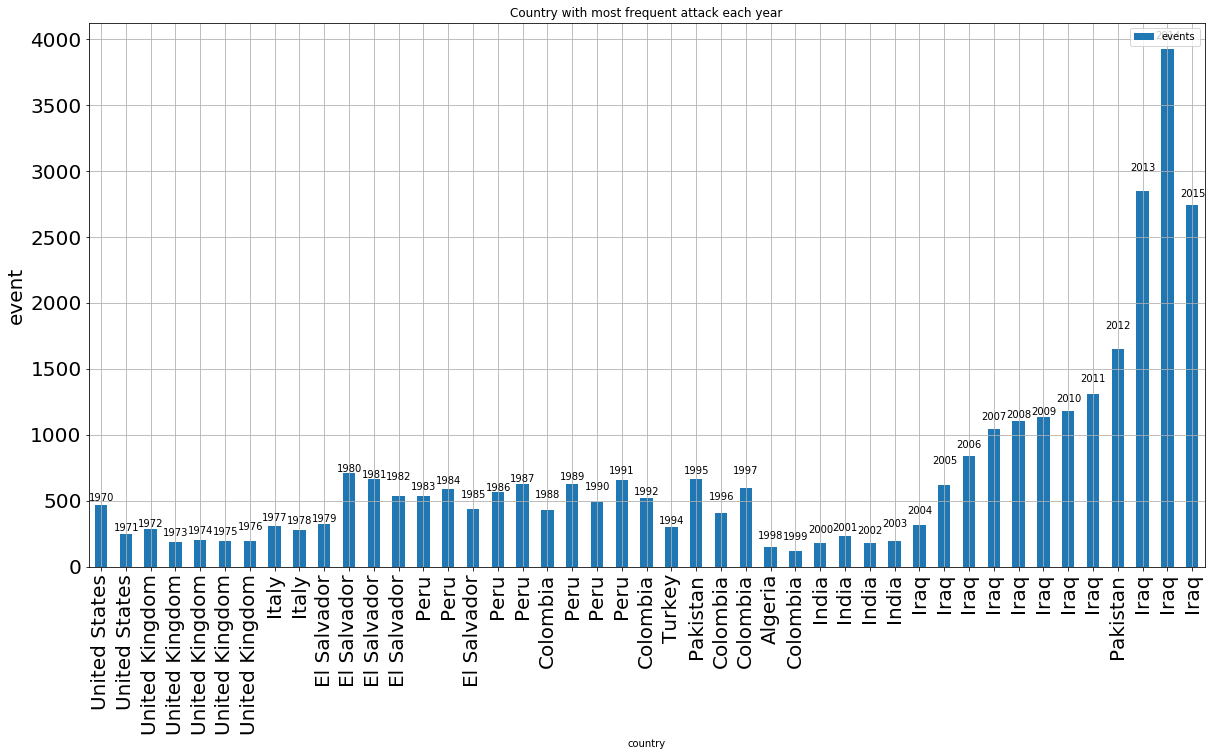

In [11]:
ax = most_event_per_year.plot(grid=True, x='country', kind='bar',title='Country with most frequent attack each year',figsize=(20,10),fontsize= 20, mark_right=True, use_index=True)

ax.annotate('1970', xy=(0,425 ), xytext=(-0.5, 500) )
ax.annotate('1971', xy=(0,425 ), xytext=(0.5, 270) )
ax.annotate('1972', xy=(0,425 ), xytext=(1.5, 300) )
ax.annotate('1973', xy=(0,425 ), xytext=(2.5, 235) )
ax.annotate('1974', xy=(0,425 ), xytext=(3.5, 250) )
ax.annotate('1975', xy=(0,425 ), xytext=(4.5, 240) )
ax.annotate('1976', xy=(0,425 ), xytext=(5.5, 280) )
ax.annotate('1977', xy=(0,425 ), xytext=(6.5, 345) )
ax.annotate('1978', xy=(0,425 ), xytext=(7.5, 325) )
ax.annotate('1979', xy=(0,425 ), xytext=(8.5, 340) )

ax.annotate('1980', xy=(0,425 ), xytext=(9.5, 720) )
ax.annotate('1981', xy=(0,425 ), xytext=(10.5, 675) )
ax.annotate('1982', xy=(0,425 ), xytext=(11.5, 655) )
ax.annotate('1983', xy=(0,425 ), xytext=(12.5, 585) )
ax.annotate('1984', xy=(0,425 ), xytext=(13.5, 625) )
ax.annotate('1985', xy=(0,425 ), xytext=(14.5, 525) )
ax.annotate('1986', xy=(0,425 ), xytext=(15.5, 575) )
ax.annotate('1987', xy=(0,425 ), xytext=(16.5, 645) )
ax.annotate('1988', xy=(0,425 ), xytext=(17.5, 525) )
ax.annotate('1989', xy=(0,425 ), xytext=(18.5, 655) )
ax.annotate('1990', xy=(0,425 ), xytext=(19.5, 585) )
ax.annotate('1991', xy=(0,425 ), xytext=(20.5, 705) )

ax.annotate('1992', xy=(0,425 ), xytext=(21.5, 545) )
ax.annotate('1994', xy=(0,425 ), xytext=(22.5, 325) )
ax.annotate('1995', xy=(0,425 ), xytext=(23.5, 705) )
ax.annotate('1996', xy=(0,425 ), xytext=(24.5, 505) )
ax.annotate('1997', xy=(0,425 ), xytext=(25.5, 700) )
ax.annotate('1998', xy=(0,425 ), xytext=(26.5, 210) )
ax.annotate('1999', xy=(0,425 ), xytext=(27.5, 200) )
ax.annotate('2000', xy=(0,425 ), xytext=(28.5, 255) )
ax.annotate('2001', xy=(0,425 ), xytext=(29.5, 270) )
ax.annotate('2002', xy=(0,425 ), xytext=(30.5, 250) )
ax.annotate('2003', xy=(0,425 ), xytext=(31.5, 300) )
ax.annotate('2004', xy=(0,425 ), xytext=(32.5, 400) )

ax.annotate('2005', xy=(0,425 ), xytext=(33.5, 780) )
ax.annotate('2006', xy=(0,425 ), xytext=(34.5, 900) )
ax.annotate('2007', xy=(0,425 ), xytext=(35.5, 1110) )
ax.annotate('2008', xy=(0,425 ), xytext=(36.5, 1125) )
ax.annotate('2009', xy=(0,425 ), xytext=(37.5, 1150) )
ax.annotate('2010', xy=(0,425 ), xytext=(38.5, 1250) )
ax.annotate('2011', xy=(0,425 ), xytext=(39.5, 1400) )
ax.annotate('2012', xy=(0,425 ), xytext=(40.5, 1800) )
ax.annotate('2013', xy=(0,425 ), xytext=(41.5, 3000) )
ax.annotate('2014', xy=(0,425 ), xytext=(42.5, 4000) )
ax.annotate('2015', xy=(0,425 ), xytext=(43.5, 2800) )









ax.set_ylabel("event",fontsize=20)
plt.show()

## Did the number of attacks increase per year?

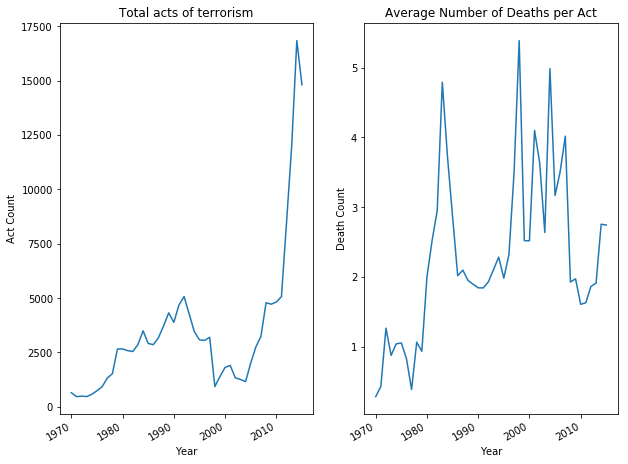

In [12]:
count_year = t_file.groupby(['iyear']).count()
mean_year = t_file.groupby(['iyear']).mean()

fig = plt.figure(figsize = (10,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.set(title = 'Total acts of terrorism', ylabel = 'Act Count', xlabel = 'Year')
ax1.plot(count_year.index, count_year.eventid)
ax2.set(title = 'Average Number of Deaths per Act', ylabel = 'Death Count', xlabel = 'Year')
ax2.plot(mean_year.index, mean_year.nkill)
fig.autofmt_xdate()

## Success rate of attacks

/Users/Apple/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/Apple/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



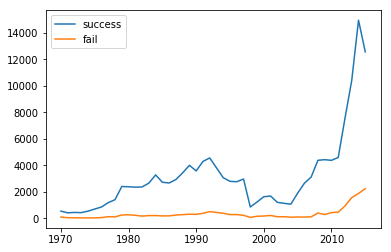

In [13]:
d = pd.read_csv('globalterrorismdb_0616dist.csv', encoding='ISO-8859-1',  
                usecols=[0, 1, 2, 3, 8, 11, 13, 14, 26, 29, 35, 37, 84, 100, 103]
               )

d = d.rename(
    columns={'eventid':'id', 'iyear':'year', 'imonth':'month', 'iday':'day',
             'country_txt':'country', 'provstate':'state', 'success':'success',
             'targtype1_txt':'target', 'targsubtype1_txt' : 'targetsub',
             'weaptype1_txt':'weapon', 'attacktype1_txt':'attack',
             'nkill':'fatalities', 'nwound':'injuries'})

d['fatalities'] = d['fatalities'].fillna(0).astype(int)
d['injuries'] = d['injuries'].fillna(0).astype(int)
d['day'][d.day == 0] = 1
d['month'][d.month == 0] = 1
d['date'] = pd.to_datetime(d[['day', 'month', 'year']])

success_counts=d[d.success==1]['year'].value_counts().sort_index()
fail_counts=d[d.success==0]['year'].value_counts().sort_index()
plt.plot(success_counts,label="success")
plt.plot(fail_counts,label="fail")
plt.legend(loc=2)

## Success rate of attacks in Thailand

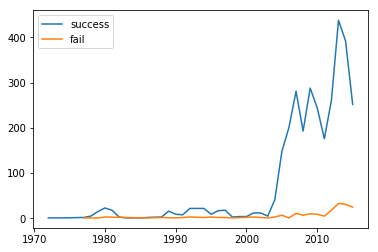

In [14]:
Thaiterror = d[(d.country == 'Thailand')]
success_counts=Thaiterror[Thaiterror.success==1]['year'].value_counts().sort_index()
fail_counts=Thaiterror[Thaiterror.success==0]['year'].value_counts().sort_index()
plt.plot(success_counts,label="success")
plt.plot(fail_counts,label="fail")
plt.legend(loc=2)

gname is the name of the terrorist group, might use gsubname
natlty1_txt is the nationality
Use crit1,2 ,3, doubtterr, suicide vs success (see the correlation)
targtype1_txt, nkill, nwound, property, propextent, nhostkid, ransom, ransomamt, ransompaid, hostkidoutcome
nreleased, INT_LOG, INT_IDEO, INT_MISC, related
might use claimed for another question

## Predict the future success rate

In [15]:
# from sklearn.decomposition import PCA
# from sklearn.model_selection import train_test_split

# cols = [8, 11, 26, 29, 35, 37, 84, 100, 103]
# nameof = ["crit1", "crit2", "crit3", "natlty1_txt", "doubtterr", "suicide", "success", "targtype1_txt",
#          "nkill","nwound", "property", "propextent", "nhostkid", "ransom", "ransompaid", "hostkidoutcome",
#          "nreleased", "INT_LOG", "INT_IDEO", "INT_MISC", "related", "gname","gsubname"] # "gname","gsubname",

# get all the attacks with the label of attack
# then do PCA transformation and classify it 
# and then compare it with the train test split 
# then take it and predict the future rate

# for i in range(0,len(t_file.columns)):
#     if t_file.columns[i] in nameof:
#         cols.append(i)

# cols = set(cols)

# pre = pd.read_csv('globalterrorismdb_0616dist.csv',  encoding='ISO-8859-1',
#                 usecols=cols
#                )
# pre = pre.rename(
#     columns={'eventid':'id',
#              'country_txt':'country', 'provstate':'state',
#              'targtype1_txt':'target', 'targsubtype1_txt' : 'targetsub',
#              'weaptype1_txt':'weapon', 'attacktype1_txt':'attack',
#              'nkill':'fatalities', 'nwound':'injuries'})

# pre['fatalities'] = pre['fatalities'].fillna(0).astype(int)
# pre['injuries'] = pre['injuries'].fillna(0).astype(int)
# # pre['day'][pre.day == 0] = 1
# # pre['month'][pre.month == 0] = 1
# # pre['date'] = pd.to_datetime(pre[['day', 'month', 'year']])
# # pre.drop("date", axis=0)
# pca = PCA()

# for i in pre.columns:
#     if type(i) == unicode:
#         i = str(i)
#         try:
#             pre[i] = pre[i].astype('str')
#         except:
#             print i

            
# #x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

# print pre.head()
# pca.fit(pre)

/Users/Apple/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



Random Forest accuracy score: 
0.907893477914


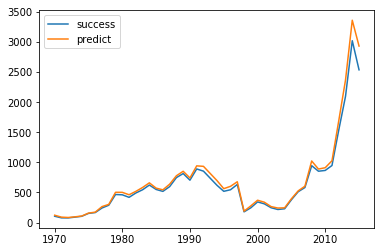

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

d = pd.read_csv('globalterrorismdb_0616dist.csv', encoding='ISO-8859-1',  
                usecols=[0, 1, 2, 3, 8, 11, 13, 14, 26, 29, 35, 37, 84, 100, 103])
 
d = d.rename(
    columns={'eventid':'id', 'iyear':'year', 'imonth':'month', 'iday':'day',
             'country_txt':'country', 'provstate':'state', 'success':'success','targtype1_txt':'target', 
             'targsubtype1_txt' : 'targetsub',
             'weaptype1_txt':'weapon', 'attacktype1_txt':'attack',
             'nkill':'fatalities', 'nwound':'injuries'})


success=pd.DataFrame(d['success'])
date = pd.DataFrame(d["year"])

success = pd.concat([success, date], axis =1)

features=pd.concat( [pd.get_dummies(d['attack'],prefix='atk'),
                    pd.get_dummies(d['weapon'],prefix='wpn')     
                    ],axis=1)

features_train, features_test,target_train, target_test = train_test_split(features,success, test_size = 0.2,random_state=0)
ids = features_test.index
#Random Forest
forest=RandomForestClassifier(n_estimators=10)
forest = forest.fit( features_train, target_train['success'])
output = forest.predict(features_test).astype(int)
results1 = pd.DataFrame(data=output,index=ids,columns=['prediction'])
results = target_test.join(results1)
print("Random Forest accuracy score: " )
print(accuracy_score(results['success'],results['prediction']))
success_counts=results[results.success==1]['year'].value_counts().sort_index()
predic=results[results.prediction==1]['year'].value_counts().sort_index()
plt.plot(success_counts,label="success")
plt.plot(predic,label="predict")
plt.legend(loc=2)

In [17]:
from sklearn.svm import SVR

data = np.unique(date)
X = np.array(data)
Y = np.array(success_counts)

svr = SVR(kernel='rbf', C=1e5, gamma=0.01)
test = np.array([2016,2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025])
all_test = np.concatenate((data, test), axis=0)
svr.fit(X.reshape(-1,1),Y.flatten())
pred_SVR = svr.predict(test.reshape(-1,1))

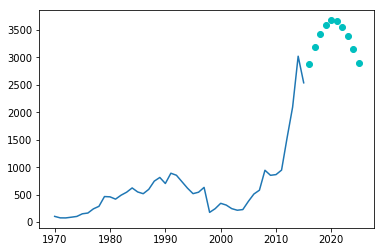

In [18]:
plt.plot(test, pred_SVR, 'co', label='SVR')
plt.plot(success_counts)

In [19]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12,center=False).mean()
    rolstd = timeseries.rolling(window=12,center=False).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

Results of Dickey-Fuller Test:
Test Statistic                  1.124248
p-value                         0.995418
#Lags Used                      0.000000
Number of Observations Used    44.000000
Critical Value (5%)            -2.929886
Critical Value (1%)            -3.588573
Critical Value (10%)           -2.603185
dtype: float64


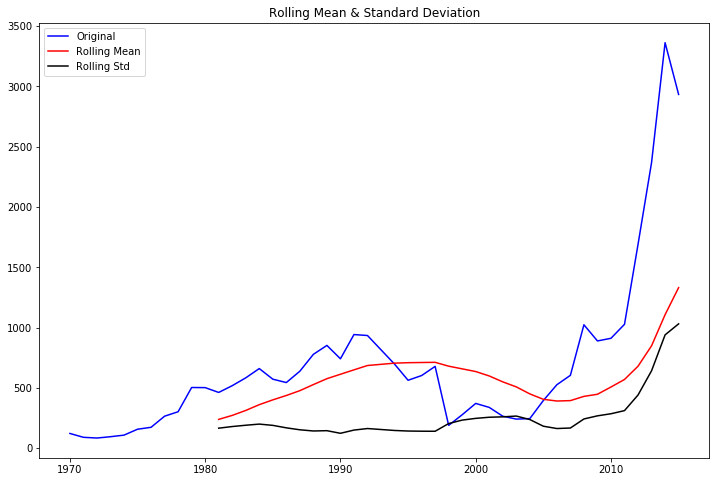

In [20]:
test_stationarity(predic)

Results of Dickey-Fuller Test:
Test Statistic                 -0.735448
p-value                         0.837353
#Lags Used                      0.000000
Number of Observations Used    44.000000
Critical Value (5%)            -2.929886
Critical Value (1%)            -3.588573
Critical Value (10%)           -2.603185
dtype: float64


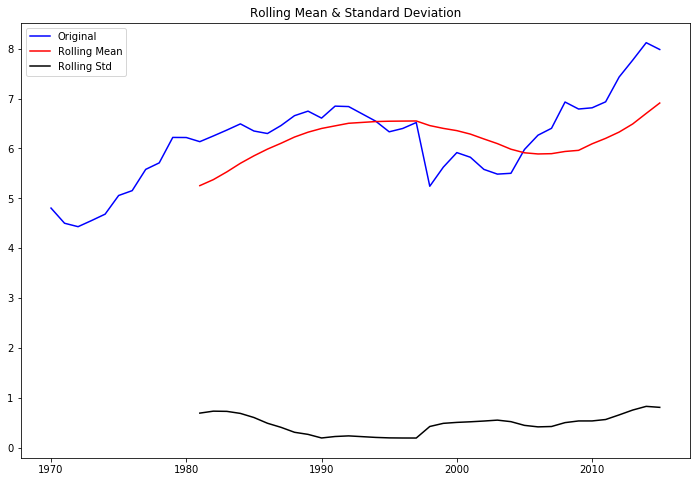

In [21]:
d.riders_log= predic.apply(lambda x: np.log(x))  
test_stationarity(d.riders_log)

Results of Dickey-Fuller Test:
Test Statistic                 -4.866465
p-value                         0.000041
#Lags Used                      0.000000
Number of Observations Used    43.000000
Critical Value (5%)            -2.931550
Critical Value (1%)            -3.592504
Critical Value (10%)           -2.604066
dtype: float64


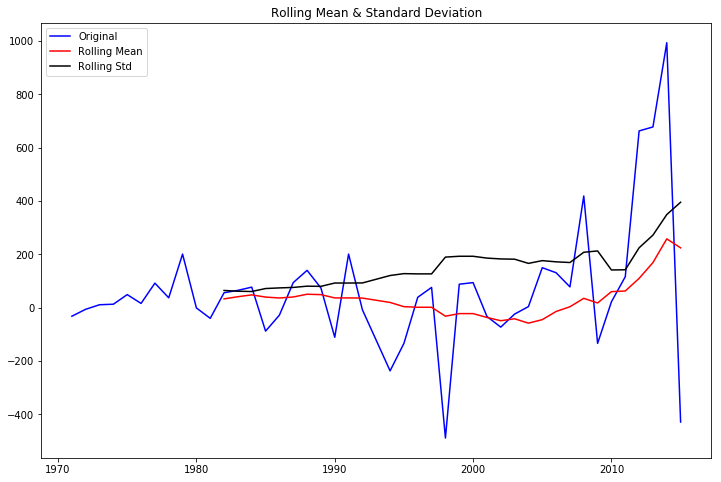

In [22]:
d['first_difference'] = predic- predic.shift(1)  
test_stationarity(d.first_difference.dropna(inplace=False))

Results of Dickey-Fuller Test:
Test Statistic                -6.427070e+00
p-value                        1.733946e-08
#Lags Used                     0.000000e+00
Number of Observations Used    4.300000e+01
Critical Value (5%)           -2.931550e+00
Critical Value (1%)           -3.592504e+00
Critical Value (10%)          -2.604066e+00
dtype: float64


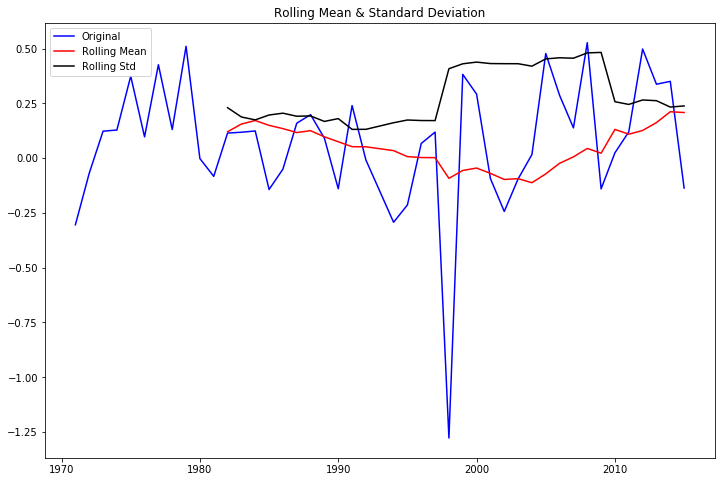

In [23]:
d['log_first_difference'] = d.riders_log - d.riders_log.shift(1)  
test_stationarity(d.log_first_difference.dropna(inplace=False))

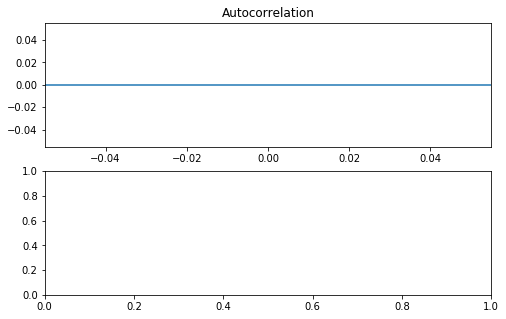

In [24]:
import statsmodels.api as sm  

fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(d.log_first_difference, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)

## Number of attacks in Thailand

In [44]:
dt = d[(d.country == 'Thailand')]
print len(dt), "total attacks" 
print len(dt) / (2015 - 1970.), "attacks per year on Average"

3338 total attacks
74.1777777778 attacks per year on Average


## Attack in Thailand with most killed

In [26]:
maxdeaths = max(dt.fatalities)

dmaxd = dt[(dt.fatalities == maxdeaths)]
dmaxd

,id,year,month,day,country,state,latitude,longitude,success,attack,target,targetsub,weapon,fatalities,injuries,first_difference,log_first_difference
8460,197905300003,1979,5,30,Thailand,NaN,17.770278,102.189444,1,Bombing/Explosion,Military,Military Unit/Patrol/Convoy,Explosives/Bombs/Dynamite,27.0,3.0,NaN,NaN


## Attack in Thailand with most killed Yearly

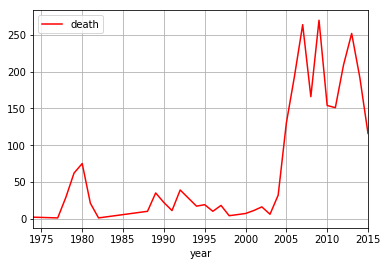

In [46]:
lst_per_year_thailand = []
for year in set(d.year):
    year_selector = d['year'] == year
    yo = d[year_selector]
    selector = yo['country'] == 'Thailand'
    yearkill = yo[selector]['fatalities'].sum()
    lst_per_year_thailand.append([year, yearkill])
    
lst_per_year_thailand_df = pd.DataFrame(lst_per_year_thailand, columns=['year','death'])
lst_per_year_thailand_df = lst_per_year_thailand_df[lst_per_year_thailand_df.death != 0]


lst_per_year_thailand_df.sort_values(['death', 'year'], ascending=[False, True]).head(30)

lst_per_year_thailand_df.plot(x='year',y='death', color= 'red')
plt.grid()

## Safest countries

/Users/Apple/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/Apple/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



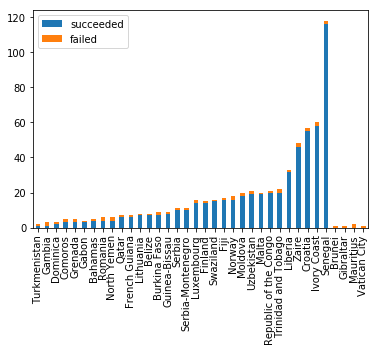

In [47]:
# least attacks
# Is thailand safe?

d['day'][d.day == 0] = 1
d['month'][d.month == 0] = 1
d['date'] = pd.to_datetime(d[['day', 'month','year']])
countbycountry = d[d.success == 0].groupby('country').count()['date']

df=pd.DataFrame(index=countbycountry[countbycountry<3].index.unique())
df["succeeded"] = d[d.success == 1].groupby('country').count()['date']
df["failed"]= d[d.success!= 1].groupby('country')['date'].count()
df.sort_values('succeeded').plot(kind='bar', stacked= True)


## Are developed countries safer?



http://www.nationsonline.org/oneworld/human_development.htm 
    

1	Norway	
2	Australia	
3	Netherlands	
4	United States	
5	New Zealand
6	Canada	
7	Ireland	
8	Liechtenstein	
9	Germany	
10	Sweden	
11	Switzerland	
12	Japan	
13	Hong Kong, China (SAR)	
14	Iceland	
15	Korea, Republic of	
16	Denmark
17	Israel	
18	Belgium
19	Austria	
20	France	
21	Slovenia	
22	Finland	
23	Spain	
24	Italy	
25	Luxembourg	
26	Singapore	
27	Czech Republic	
28	United Kingdom	
29	Greece	
30	United Arab Emirates	

In [30]:
develop = ['Norway','Australia', 'Netherlands', 'United States', 'New Zealand', 'Canada', 'Ireland','Liechtenstein',
          'Germany', ' Sweden', 'Switzerland', 'Japan', 'Hong Kong', 'Iceland', 'South Korea', 'Denmark', 'Israel',
          'Belgium', 'Austria', 'France', 'Slovenia', 'Finland', 'Spain', 'Italy', 'Luxem']

In [51]:
dd = pd.read_csv('globalterrorismdb_0616dist.csv', encoding='ISO-8859-1',  
                usecols=[0, 1, 2, 3, 8, 11, 13, 14, 26, 29, 35, 37, 84, 100, 103]
               )

In [53]:
lst_freq_attack = []
develop_year_dict = dict()
for year in set(dd.iyear):
    frequent_log = 0
    year_selector = dd['iyear'] == year
    selector = dd[year_selector]
    for country in develop:
        country_selector = selector['country_txt'] == country
        ulti_selector = selector[country_selector].index
        if len(ulti_selector) > frequent_log:
            frequent_log = len(ulti_selector)
            develop_year_dict[year] = [country, len(ulti_selector)]
develop_year_dict_df = pd.DataFrame(develop_year_dict)

develop_year_dict_df_fix = develop_year_dict_df.T

develop_year_dict_df_fix.columns = ['country', 'event']




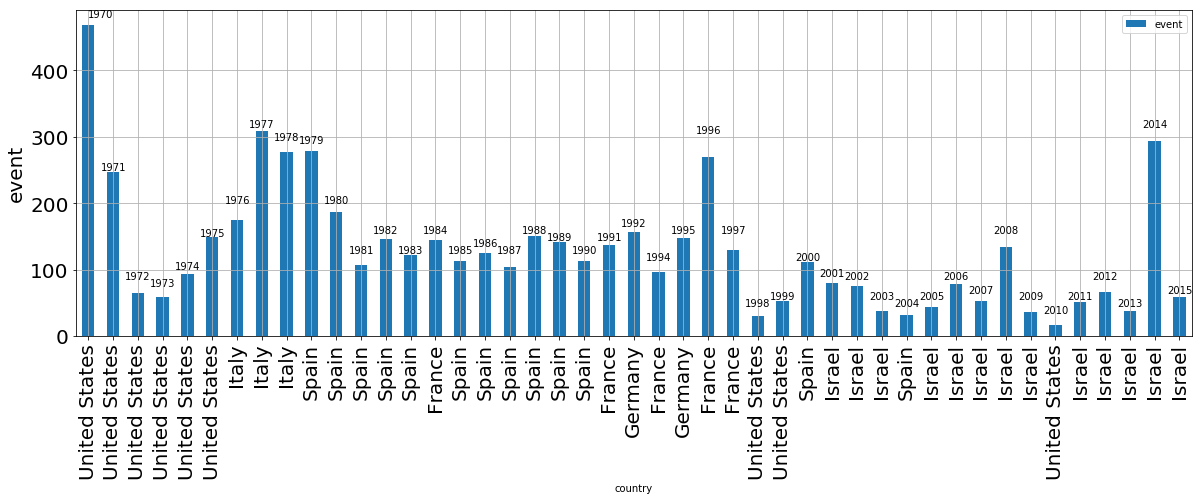

In [54]:
ax = develop_year_dict_df_fix.plot(kind='bar',x='country', figsize=(20,6), fontsize=20, grid=True)

ax.annotate('1970', xy=(0,425 ), xytext=(0, 480) )
ax.annotate('1971', xy=(0,425 ), xytext=(0.5, 250) )
ax.annotate('1972', xy=(0,425 ), xytext=(1.5, 85) )
ax.annotate('1973', xy=(0,425 ), xytext=(2.5, 75) )
ax.annotate('1974', xy=(0,425 ), xytext=(3.5, 100) )
ax.annotate('1975', xy=(0,425 ), xytext=(4.5, 150) )
ax.annotate('1976', xy=(0,425 ), xytext=(5.5, 200) )
ax.annotate('1977', xy=(0,425 ), xytext=(6.5, 315) )
ax.annotate('1978', xy=(0,425 ), xytext=(7.5, 295) )
ax.annotate('1979', xy=(0,425 ), xytext=(8.5, 290) )
ax.annotate('1980', xy=(0,425 ), xytext=(9.5, 200) )
ax.annotate('1981', xy=(0,425 ), xytext=(10.5, 125) )
ax.annotate('1982', xy=(0,425 ), xytext=(11.5, 155) )
ax.annotate('1983', xy=(0,425 ), xytext=(12.5, 125) )
ax.annotate('1984', xy=(0,425 ), xytext=(13.5, 155) )
ax.annotate('1985', xy=(0,425 ), xytext=(14.5, 125) )
ax.annotate('1986', xy=(0,425 ), xytext=(15.5, 135) )
ax.annotate('1987', xy=(0,425 ), xytext=(16.5, 125) )
ax.annotate('1988', xy=(0,425 ), xytext=(17.5, 155) )
ax.annotate('1989', xy=(0,425 ), xytext=(18.5, 145) )
ax.annotate('1990', xy=(0,425 ), xytext=(19.5, 125) )
ax.annotate('1991', xy=(0,425 ), xytext=(20.5, 145) )

ax.annotate('1992', xy=(0,425 ), xytext=(21.5, 165) )
ax.annotate('1994', xy=(0,425 ), xytext=(22.5, 115) )
ax.annotate('1995', xy=(0,425 ), xytext=(23.5, 155) )
ax.annotate('1996', xy=(0,425 ), xytext=(24.5, 305) )
ax.annotate('1997', xy=(0,425 ), xytext=(25.5, 155) )
ax.annotate('1998', xy=(0,425 ), xytext=(26.5, 45) )
ax.annotate('1999', xy=(0,425 ), xytext=(27.5, 55) )
ax.annotate('2000', xy=(0,425 ), xytext=(28.5, 115) )
ax.annotate('2001', xy=(0,425 ), xytext=(29.5, 90) )
ax.annotate('2002', xy=(0,425 ), xytext=(30.5, 85) )
ax.annotate('2003', xy=(0,425 ), xytext=(31.5, 55) )
ax.annotate('2004', xy=(0,425 ), xytext=(32.5, 45) )

ax.annotate('2005', xy=(0,425 ), xytext=(33.5, 55) )
ax.annotate('2006', xy=(0,425 ), xytext=(34.5, 85) )
ax.annotate('2007', xy=(0,425 ), xytext=(35.5, 65) )
ax.annotate('2008', xy=(0,425 ), xytext=(36.5, 155) )
ax.annotate('2009', xy=(0,425 ), xytext=(37.5, 55) )
ax.annotate('2010', xy=(0,425 ), xytext=(38.5, 35) )
ax.annotate('2011', xy=(0,425 ), xytext=(39.5, 55) )
ax.annotate('2012', xy=(0,425 ), xytext=(40.5, 85) )
ax.annotate('2013', xy=(0,425 ), xytext=(41.5, 45) )
ax.annotate('2014', xy=(0,425 ), xytext=(42.5, 315) )
ax.annotate('2015', xy=(0,425 ), xytext=(43.5, 65) )


ax.set_ylabel("event",fontsize=20)
plt.show()

## Most popular terrorist group (If any) and their biggest target

## Countries with most failed attacks

/Users/Apple/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/Apple/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



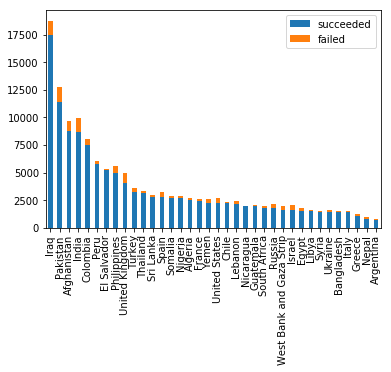

In [55]:
d['day'][d.day == 0] = 1
d['month'][d.month == 0] = 1
d['date'] = pd.to_datetime(d[['day', 'month','year']])
countbycountry = d[d.success == 1].groupby('country').count()['date']

df=pd.DataFrame(index=countbycountry[countbycountry>700].index.unique())
df["succeeded"] = d[d.success == 1].groupby('country').count()['date']
df["failed"]= d[d.success!= 1].groupby('country')['date'].count()
df[df.failed >0].sort_values(by='succeeded',ascending=False).plot(kind='bar', stacked= True)

In [56]:
terror_data = pd.read_csv('globalterrorismdb_0616dist.csv', encoding='ISO-8859-1',
                          usecols=[0, 1, 2, 3, 8, 11, 13, 14, 35, 84, 100, 103])
terror_data = terror_data.rename(
    columns={'eventid':'id', 'iyear':'year', 'imonth':'month', 'iday':'day',
             'country_txt':'country', 'provstate':'state', 'targtype1_txt':'target',
             'weaptype1_txt':'weapon', 'nkill':'fatalities', 'nwound':'injuries'})
terror_data['fatalities'] = terror_data['fatalities'].fillna(0).astype(int)
terror_data['injuries'] = terror_data['injuries'].fillna(0).astype(int)

terror_usa = terror_data[(terror_data.country == 'United States') &
                         (terror_data.state != 'Puerto Rico') &
                         (terror_data.longitude < 0)]
terror_usa['day'][terror_usa.day == 0] = 1
terror_usa['date'] = pd.to_datetime(terror_usa[['day', 'month', 'year']])

terror_usa = terror_usa[['id', 'date', 'year', 'state', 'latitude', 'longitude',
                         'target', 'weapon', 'fatalities', 'injuries']]
terror_usa = terror_usa.sort_values(['fatalities', 'injuries'], ascending = False)
terror_usa = terror_usa.drop_duplicates(['date', 'latitude', 'longitude', 'fatalities'])

/Users/Apple/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/Apple/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



## Terrorist attacks by Weapon Type in the US

In [57]:
weapon_codes = []

for attack in terror_usa['weapon'].values:
    if attack in ['Explosives/Bombs/Dynamite', 'Sabotage Equipment']:
        weapon_codes.append(1)
    elif attack == 'Incendiary':
        weapon_codes.append(2)
    elif attack in ['Firearms', 'Fake Weapons']:
        weapon_codes.append(3)
    elif attack == 'Melee':
        weapon_codes.append(5)
    elif attack == 'Biological':
        weapon_codes.append(6)
    elif attack in ['Chemical', 'Radiological']:
        weapon_codes.append(7)
    elif 'Vehicle' in attack:
        weapon_codes.append(8)
    else:
        weapon_codes.append(4)

terror_usa['weapon'] = weapon_codes
weapon_categories = ['Explosives', 'Flammables', 'Firearms', 'Miscellaneous',
                     'Knives', 'Bacteria/Viruses', 'Chemicals', 'Vehicles']

# terrorist attacks by weapon
weapon_count = np.asarray(terror_usa.groupby('weapon').weapon.count())
weapon_percent = np.round(weapon_count / sum(weapon_count) * 100, 2)

# terrorist attack fatalities by weapon
weapon_fatality = np.asarray(terror_usa.groupby('weapon')['fatalities'].sum())
weapon_yaxis = np.asarray([1.93, 1.02, 2.28, 0.875, 0.945, 0.83, 0.835, 3.2])

# terrorist attack injuries by weapon
weapon_injury = np.asarray(terror_usa.groupby('weapon')['injuries'].sum())
weapon_xaxis = np.log10(weapon_injury)

weapon_text = []
for i in range(0, 8):
    weapon_text.append(weapon_categories[i] + ' (' + weapon_percent[i].astype(str) 
                       + '%)<br>' + weapon_fatality[i].astype(str) + ' Killed, '
                       + weapon_injury[i].astype(str) + ' Injured')

weapon_fatality[6] = 7
    
data = [go.Scatter(
        x = weapon_injury,
        y = weapon_fatality,
        text = weapon_text,
        mode = 'markers',
        hoverinfo = 'text',
        marker = dict(
            size = (weapon_count + 50) / 10,
            opacity = 0.9,
            color = 'rgb(240, 140, 45)')
        )]

layout = go.Layout(
         title = 'Terrorist Attacks by Weapon in United States (1970-2015)',
         xaxis = dict(
             title = 'Injuries',
             type = 'log',
             range = [0.45, 3.51],
             tickmode = 'auto',
             nticks = 4,
             showline = True,
             showgrid = False
         ),
         yaxis = dict(
             title = 'Fatalities',
             type = 'log',
             range = [0.65, 3.33],
             tickmode = 'auto',
             nticks = 3,
             showline = True,
             showgrid = False)
         )

annotations = []
for i in range(0, 8):
    annotations.append(dict(x=weapon_xaxis[i], y=weapon_yaxis[i],
                            xanchor='middle', yanchor='top',
                            text=weapon_categories[i], showarrow=False))
layout['annotations'] = annotations

figure = dict(data = data, layout = layout)
iplot(figure)

## Terrorist attacks by targets in the US

In [58]:
# terrorist attack targets grouped in categories
target_codes = []

for attack in terror_usa['target'].values:
    if attack in ['Business', 'Journalists & Media', 'NGO']:
        target_codes.append(1)
    elif attack in ['Government (General)', 'Government (Diplomatic)']:
        target_codes.append(2)
    elif attack == 'Abortion Related':
        target_codes.append(4)
    elif attack == 'Educational Institution':
        target_codes.append(5)
    elif attack == 'Police':
        target_codes.append(6)
    elif attack == 'Military':
        target_codes.append(7)
    elif attack == 'Religious Figures/Institutions':
        target_codes.append(8)
    elif attack in ['Airports & Aircraft', 'Maritime', 'Transportation']:
        target_codes.append(9)
    elif attack in ['Food or Water Supply', 'Telecommunication', 'Utilities']:
        target_codes.append(10)
    else:
        target_codes.append(3)

terror_usa['target'] = target_codes
target_categories = ['Business', 'Government', 'Individuals', 'Healthcare', 'Education',
                     'Police', 'Military', 'Religion', 'Transportation', 'Infrastructure']

# terrorist attacks by target
target_count = np.asarray(terror_usa.groupby('target').target.count())
target_percent = np.round(target_count / sum(target_count) * 100, 2)

# terrorist attack fatalities by target
target_fatality = np.asarray(terror_usa.groupby('target')['fatalities'].sum())
target_yaxis = np.asarray([1.33, 2.36, 2.98, 0.81, 1.25, 1.71, 1.31, 1.53, 1.34, 0])

# terrorist attack injuries by target
target_injury = np.asarray(terror_usa.groupby('target')['injuries'].sum())
target_xaxis = np.log10(target_injury)

target_text = []
for i in range(0, 10):
    target_text.append(target_categories[i] + ' (' + target_percent[i].astype(str) 
                       + '%)<br>' + target_fatality[i].astype(str) + ' Killed, '
                       + target_injury[i].astype(str) + ' Injured')

data = [go.Scatter(
        x = target_injury,
        y = target_fatality,
        text = target_text,
        mode = 'markers',
        hoverinfo = 'text',
        marker = dict(
            size = target_count / 6.5,
            opacity = 0.9,
            color = 'rgb(240, 140, 45)')
        )]

layout = go.Layout(
         title = 'Terrorist Attacks by Target in United States (1970-2015)',
         xaxis = dict(
             title = 'Injuries',
             type = 'log',
             range = [1.36, 3.25],
             tickmode = 'auto',
             nticks = 2,
             showline = True,
             showgrid = False
         ),
         yaxis = dict(
             title = 'Fatalities',
             type = 'log',
             range = [0.59, 3.45],
             tickmode = 'auto',
             nticks = 4,
             showline = True,
             showgrid = False)
         )

annotations = []
for i in range(0, 10):
    annotations.append(dict(x=target_xaxis[i], y=target_yaxis[i],
                            xanchor='middle', yanchor='top',
                            text=target_categories[i], showarrow=False))
layout['annotations'] = annotations

figure = dict(data = data, layout = layout)
iplot(figure)

## Popular attack types back then vs now

In [60]:
lst_freq_attack = []
weapon_type = dict()
for year in set(dd.iyear):
    frequent_log = 0
    year_selector = dd['iyear'] == year
    selector = dd[year_selector]
    bomb = selector['attacktype1_txt'] == 'Bombing/Explosion'
    unarm_assault = selector['attacktype1_txt'] == 'Unarmed Assault'
    hijack = selector['attacktype1_txt'] == 'Hijacking'
    assassination = selector['attacktype1_txt'] == 'Assassination'
    hostage = selector['attacktype1_txt'] == 'Hostage Taking (Barricade Incident)'
    facility = selector['attacktype1_txt'] == 'Facility/Infrastructure Attack'
    kidnap = selector['attacktype1_txt'] == 'Hostage Taking (Kidnapping)'
    arm_assualt = selector['attacktype1_txt'] == 'Armed Assault'
    unknown = selector['attacktype1_txt'] == 'Unknown'


    
    bomb_count = selector[bomb].index
    unarm_assault_count = selector[unarm_assault].index
    hijack_count = selector[hijack].index
    assassination_count = selector[assassination].index
    hostage_count = selector[hostage].index
    facility_count = selector[facility].index
    kidnap_count = selector[kidnap].index
    arm_assualt_count = selector[arm_assualt].index
    unknown_count = selector[unknown].index


    
    weapon_type[year] = [len(bomb_count), len(unarm_assault_count), len(hijack_count), len(assassination_count),
                        len(hostage_count), len(facility_count), len(kidnap_count), len(arm_assualt_count),
                        len(unarm_assault_count)]




    


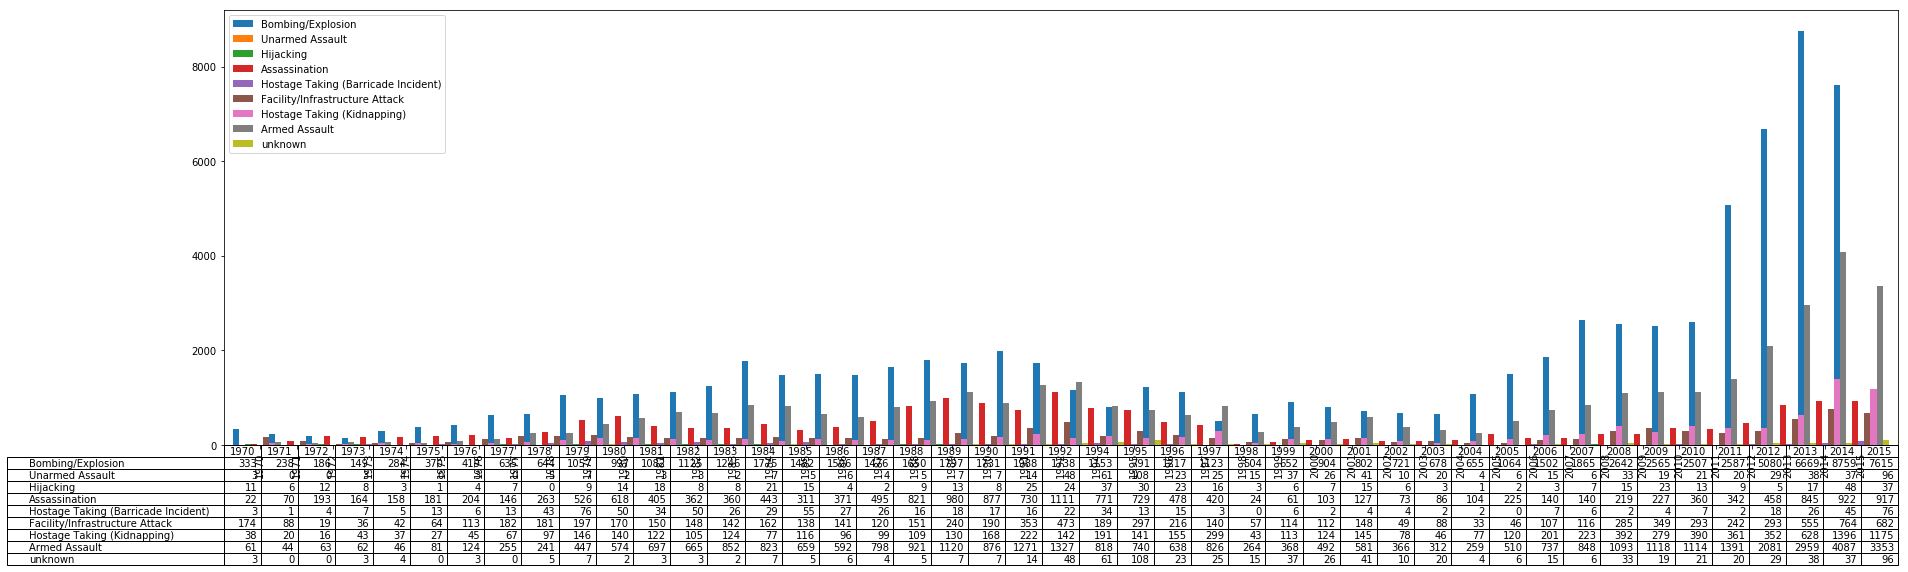

In [63]:
weapon_type_df = pd.DataFrame(weapon_type)
weapon_type_dfg = weapon_type_df[year] == 2
weapon_type_df_t = weapon_type_df.T
weapon_type_df_t.columns = ['Bombing/Explosion', 'Unarmed Assault' , 'Hijacking', 'Assassination', 'Hostage Taking (Barricade Incident)',
                           'Facility/Infrastructure Attack', 'Hostage Taking (Kidnapping)', 'Armed Assault', 'unknown']
weapon_type_df_t.plot(kind='bar',figsize=(30,8), table=True, width=1.5)


## Most succesful terrorist

## Are we in peace now?

In [ ]:
#  